In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier

In [42]:
#Load our datasets into a Pandas Dataframe
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [43]:
display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
survived = train_df['Survived']

In [45]:
#drop 'Survived' from train_df because it is our target variable
train_df = train_df.drop((['Survived']), axis =1)
display(train_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
#Let us extract the PassengerId, because we need to know which passengerId's are associated with the survival rates
train_idx = train_df['PassengerId']
test_idx = test_df['PassengerId']

In [47]:
#Combine the training and testing sets for consistent preprocessing
combined_df = pd.concat([train_df,test_df]).reset_index(drop=True) # reset index but drop so we just deal with one index column
display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
print(combined_df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


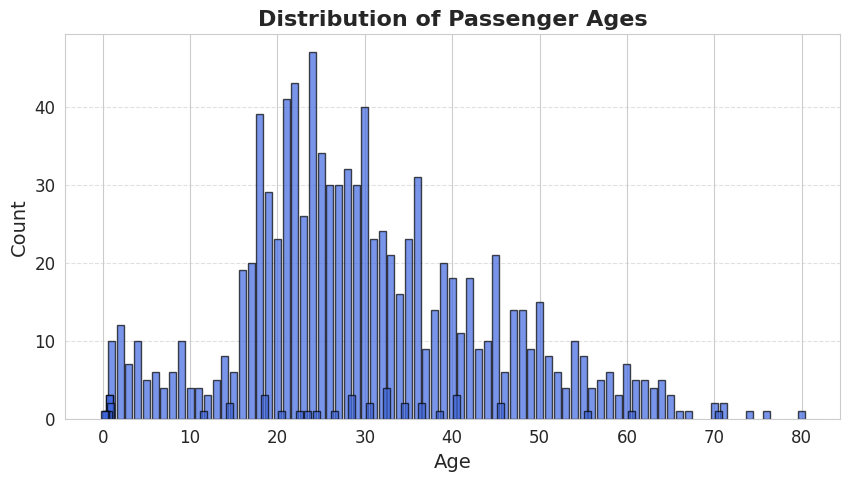

In [49]:
#Let us visualize the age of all passengers
#This will give us an idea on how to fix the missing values
y = combined_df['Age'].value_counts()
x = y.index.values

sns.set_style("whitegrid")

plt.figure(figsize = (10,5))
plt.title("Distribution of Passenger Ages", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.bar(x, y, color="royalblue", edgecolor="black", alpha=0.7)
plt.show()

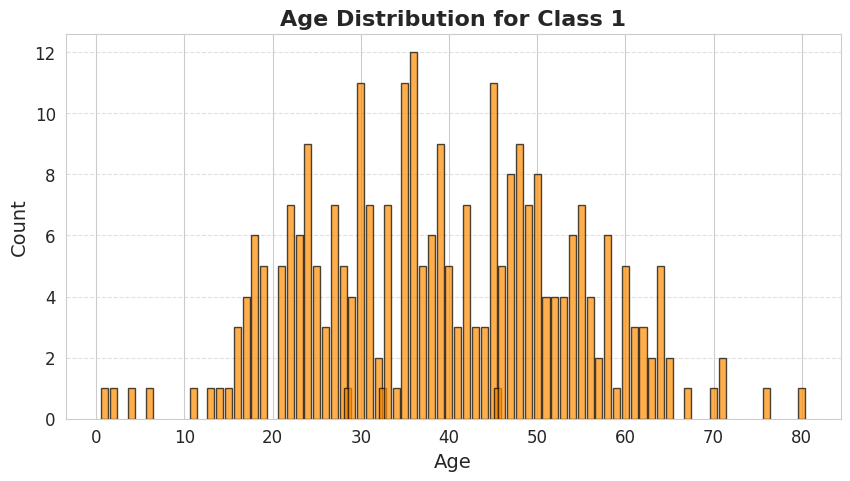

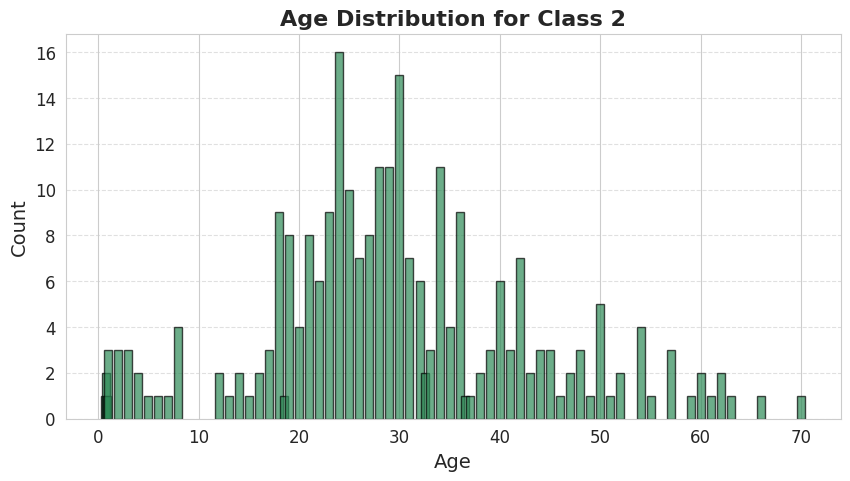

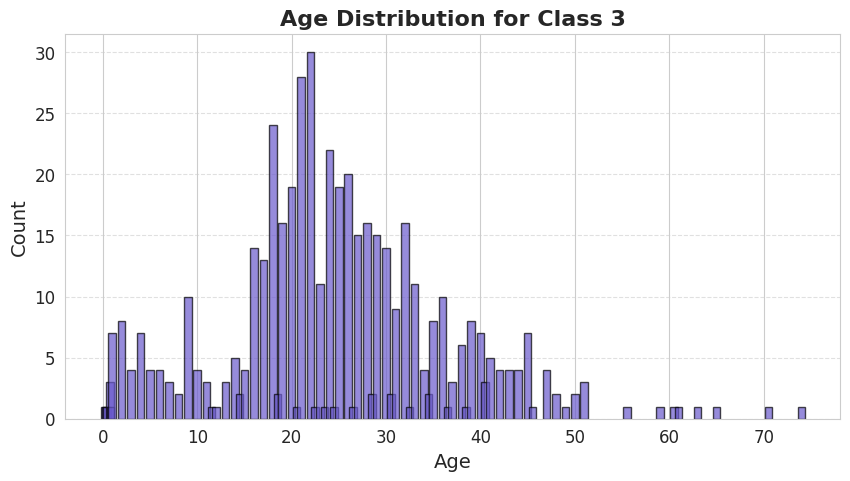

         Age
Pclass      
1       39.0
2       29.0
3       24.0


In [50]:
#One idea we can do to fix the missing values for age is that we can hypothesize that the higher class passengers were on the older side
#while the middle and lower class were on the more younger side

sns.set_style("whitegrid")

class_colors = {1: "darkorange", 2: "seagreen", 3: "slateblue"}

class_age = combined_df[['Pclass', 'Age']]

for i in range(1, 4):
    plt.figure(figsize=(10, 5))

    age_data = class_age[class_age['Pclass'] == i]['Age'].value_counts().sort_index()

    plt.bar(age_data.index, age_data.values, color=class_colors[i], edgecolor="black", alpha=0.7)

    plt.title(f'Age Distribution for Class {i}', fontsize=16, fontweight="bold")
    plt.xlabel("Age", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.show()

medians = class_age.groupby('Pclass').median()
print(medians)


In [51]:
# using for loop to fill median values for all the missing data by class
for i in range(3):  #loops through all 3 classes
  idx = np.where((combined_df['Pclass'] == i+1) & (combined_df['Age'].isnull()))[0] #find idx where pclass is equal to current class and age is missing
  combined_df.loc[idx, 'Age'] = medians.values[i][0] #get median for that class and replace it

display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [52]:
#fixing missing fare value for the one missing value
#for this person we can assume that if you embarked from the same location and had a same class ticket, you probably had a same cost
display(combined_df[combined_df['Fare'].isnull()])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


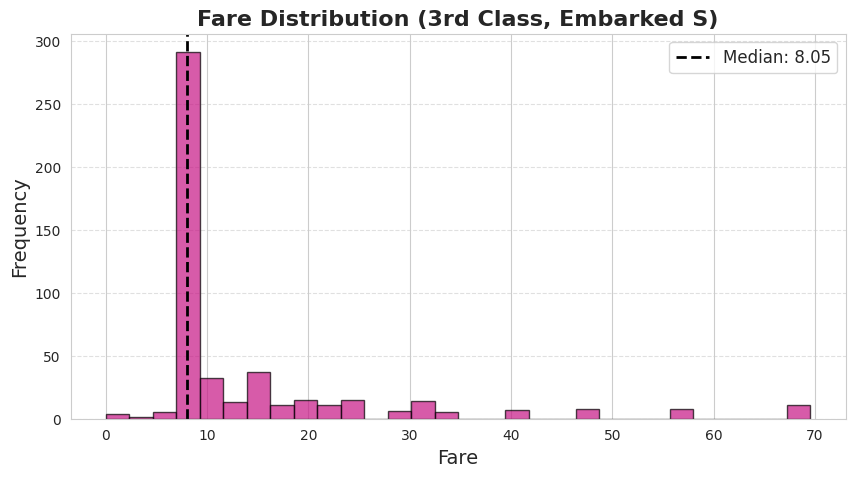

In [53]:
sns.set_style("whitegrid")

# Filter fares for Pclass 3 and Embarked 'S'
sim_fares = combined_df[(combined_df['Pclass'] == 3) & (combined_df['Embarked'] == 'S')]['Fare']
median_fare = sim_fares.median()

plt.figure(figsize=(10,5))
plt.hist(sim_fares, bins=30, color="mediumvioletred", edgecolor="black", alpha=0.7)

plt.axvline(median_fare, color="black", linestyle="dashed", linewidth=2, label=f'Median: {median_fare:.2f}')

plt.title("Fare Distribution (3rd Class, Embarked S)", fontsize=16, fontweight="bold")
plt.xlabel("Fare", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

# Filling the missing fares with the median
combined_df['Fare'] = combined_df['Fare'].fillna(median_fare)


In [54]:
#we will use similar method for the two missing embarked values
#we can see that the two people missing embarked values they both were in Pclass 1 and had same tickets
display(combined_df[combined_df['Embarked'].isnull()])

sim_emb = combined_df[(combined_df['Pclass'] == 1) & (combined_df['Fare'] >= 70)  & (combined_df['Fare'] <= 70)]['Embarked']

print(sim_emb.value_counts())

combined_df['Embarked'] = combined_df['Embarked'].fillna('C')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Series([], Name: count, dtype: int64)


In [55]:
combined_df['Cabin'] = combined_df['Cabin'].fillna('M')
combined_df['Cabin'] = combined_df['Cabin'].str[0]

print(combined_df['Cabin'].value_counts())

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [56]:
#the 1 'T' cabin has to be a typo so I will change it to M
idx = np.where(combined_df['Cabin'] == 'T')[0]
combined_df.loc[idx, 'Cabin'] = 'M'

In [57]:
display(combined_df)

print(combined_df.isnull().sum())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Success!! As we can see we have no missing values.

In [58]:
#Now that we have no missing values lets think about our next step
#Let us go through every variable and see if they serve a purpose or can we get rid of the variable in its entirety
print(combined_df.nunique())

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64


In [59]:
#Names
print(combined_df['Name'].unique())

#Create arrays
names = combined_df['Name']
last_names = []
titles = []
first_names = []

#loop through each name first
#check if there is a comma or not, if there is comma split first and last name, if there is a period split first name and title
for name in names:
  if ',' not in name:
    last_names.append('')
  else:
    last, name = name.split(', ',1)# first comma split
    last_names.append(last)

  if '.' not in name:
    titles.append('')
  else:
    title, first = name.split('. ',1)# first period split
    titles.append(title)
    first_names.append(first)

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

#Lets start grouping the titles

idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

print('\n')
print(np.unique(titles, return_counts = True))

combined_df['Title'] = titles
display(combined_df)

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 757, 198, 264,  67,   8]))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr


In [60]:
#Now Let us work on the age category

print(combined_df['Age'].min(), combined_df['Age'].max())

0.17 80.0


In [61]:
#Lets create an array of bins
#Then assign each passenger to an age bin they belong in
bins = np.array([0,10,20,30,40,50,60,70,80])

combined_df['Age_Bin'] = pd.cut(combined_df['Age'], bins)

display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]"


In [62]:
#Lets identify group bookings by counting the ticket frequencies

ticket_dict = dict(combined_df['Ticket'].value_counts())

combined_df['tkt_count'] = combined_df['Ticket'].map(ticket_dict)

display(combined_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1


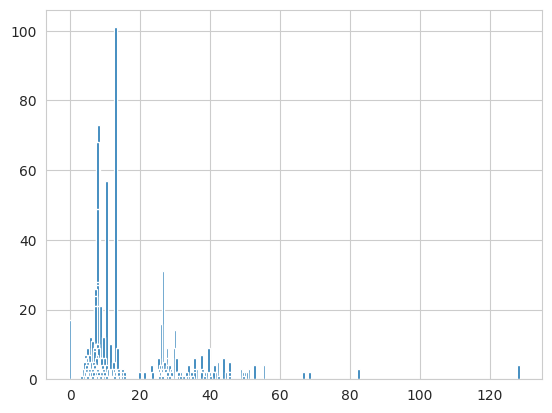

0.0 128.0823


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count,Fare_per_Ticket,Fare_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"


In [63]:
#Let us compute the individual fare per passenger by dividing the total fare by the number of people sharing the ticket
#Then we can visualize the distribution, finds min/max values, and bin the fares into groups.
combined_df['Fare_per_Ticket'] = combined_df['Fare']/combined_df['tkt_count']

plt.bar(combined_df['Fare_per_Ticket'].value_counts().index.values, combined_df['Fare_per_Ticket'].value_counts())
plt.show()

print(combined_df['Fare_per_Ticket'].min(), combined_df['Fare_per_Ticket'].max())

bins = [0,20,40,60,80,150]
combined_df['Fare_Bin'] = pd.cut(combined_df['Fare_per_Ticket'], bins)


display(combined_df)

In [64]:
#Lets calculate the total family size for each passenger

combined_df['Num_Family'] = combined_df['SibSp'] + combined_df['Parch'] + 1 #+1 to include the person as well

display(combined_df)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tkt_count,Fare_per_Ticket,Fare_Bin,Num_Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


In [65]:
combined_df.drop(['Name','Age','Ticket','Fare','tkt_count','Fare_per_Ticket','Fair_per_Ticket'], axis=1, inplace=True, errors = 'ignore')
display(combined_df)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


In [66]:
print(combined_df.nunique())

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Title             7
Age_Bin           8
Fare_Bin          5
Num_Family        9
dtype: int64


Finally we have our data preprocessed now we can start building models

In [67]:
combined_df.set_index('PassengerId', inplace=True) #let index be the passenger id
display(combined_df)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


In [68]:
#label encoder
#first create a copy so we dont modify the original dataframe
#convert everything to strings then apply label encoding to all columns

label_enc = combined_df.copy()

label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform) #take everything and set unique identifier

display(label_enc)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,Num_Family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [69]:
#some columns are not greater than one another, like sex, embarked, title

one_hot = label_enc.copy()

one_hot = pd.get_dummies(one_hot, columns = ['Sex','Embarked', 'Title'])
display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare_Bin,Num_Family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,False,True,False,False,True,False,False,True,False,False,False,False
2,0,1,0,2,3,1,2,True,False,True,False,False,False,False,False,True,False,False,False
3,2,0,0,7,2,0,0,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,0,2,3,1,2,True,False,False,False,True,False,False,False,True,False,False,False
5,2,0,0,7,3,0,0,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,False,True,False,False,True,False,False,True,False,False,False,False
1306,0,0,0,2,3,1,0,True,False,True,False,False,False,False,False,False,False,True,False
1307,2,0,0,7,3,0,0,False,True,False,False,True,False,False,True,False,False,False,False


**Machine Learning**

In [70]:
#Lets get ready for our model
#extract training where we know the survival

X = one_hot.loc[train_idx].values
y = survived.values

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [71]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7932960893854749

In [72]:
#We need to optimize the Random Forest Classifier using RandomizedSearchCV to find the best hyperparameters
#then evaluate the model performance on the Titanic dataset

params = {'criterion': ['gini', 'entropy'],
          'n_estimators': [20,50,100,200,300,400,500,800,1000],
          'max_depth':np.arange(3,50),
          'min_samples_split':np.arange(1,1000),
          'max_features':['sqrt', 'log2'],
          'max_samples':np.linspace(0.1,0.9,10)}
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),params, scoring = 'accuracy', random_state = 0, cv=5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print('Train Acc:', rand_search.best_score_)
preds = rand_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))

{'n_estimators': 200, 'min_samples_split': np.int64(16), 'max_samples': np.float64(0.6333333333333333), 'max_features': 'sqrt', 'max_depth': np.int64(49), 'criterion': 'gini'} 

Train Acc: 0.8286417807544568
Test Acc: 0.8324022346368715


In [73]:
#Lets refine hyperparameter tuning for the Random Forest model
#By using RandomizedSearchCV based on the best parameters found in a previous code
#We do this to further improve model performance and reduce risk of overfitting

n_estimators = np.linspace(rand_params['n_estimators'] -10, rand_params['n_estimators']+10, 3).astype(int)

min_samples_split = np.arange(rand_params['min_samples_split']-3, rand_params['min_samples_split']+3).astype(int)

max_samples = np.linspace(rand_params['max_samples']-.05, rand_params['max_samples']+.05,6)

max_depth = np.arange(rand_params['max_depth']-5, rand_params['max_depth']+5).astype(int)

params = {'criterion':[rand_params['criterion']],
          'n_estimators': n_estimators,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'max_features':[rand_params['max_features']],
          'max_samples':max_samples}

grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),params, scoring = 'accuracy', cv=5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print('Train Acc:', grid_search.best_score_)
preds = grid_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))

{'n_estimators': np.int64(190), 'min_samples_split': np.int64(18), 'max_samples': np.float64(0.6233333333333333), 'max_features': 'sqrt', 'max_depth': np.int64(51), 'criterion': 'gini'} 

Train Acc: 0.8314586821629076
Test Acc: 0.8268156424581006


**Adaboost Algorithm**

In [74]:
#Lets try Adaptive Boosting method to further increase our accuracy
clf = AdaBoostClassifier(random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7988826815642458

In [75]:
#Again similar to what we have been doing before
#Lets optimizes the AdaBoostClassifier hyperparameters using RandomizedSearchCV
#Then find the best parameters, and evaluates the model performance on the Titanic dataset

params = {'n_estimators': [50,100,200,300,400,500,800,1000],
          'learning_rate': [1.0, 0.1, 0.01, 0.001]}

rand_search = RandomizedSearchCV(AdaBoostClassifier(random_state=0), params, scoring = 'accuracy', random_state=0, cv=5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_

print(rand_params, '\n')
print('Train Acc:', rand_search.best_score_)
preds = rand_search.predict(X_test)
print('Test Acc:', accuracy_score(preds,y_test))


{'n_estimators': 200, 'learning_rate': 1.0} 

Train Acc: 0.8258544272628778
Test Acc: 0.8100558659217877


In [76]:
#And yet again we lets fine tune the hyperparameters of the AdaBoost model after performing the initial RandomizedSearchCV
#Again we refine the search space for n_estimators and learning_rate,
#then use RandomizedSearchCV again to identify the best combination of these hyperparameters.

n_estimators = np.linspace(rand_params['n_estimators']-50,rand_params['n_estimators']+50,3).astype(int)
learning_rate = np.linspace(rand_params['learning_rate']*.9,rand_params['learning_rate']*1.1,3 )


params = {'n_estimators': n_estimators,
          'learning_rate': learning_rate}

grid_search = RandomizedSearchCV(AdaBoostClassifier(random_state=0), params, scoring = 'accuracy', cv=5,n_iter=9)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_

print(grid_params, '\n')
print('Train Acc:', grid_search.best_score_)
preds = grid_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))


{'n_estimators': np.int64(250), 'learning_rate': np.float64(1.0)} 

Train Acc: 0.8272628779671033
Test Acc: 0.8100558659217877


We can conclude from the results of our models that:

1.   We have a stable performance across all models
2.   Good generalization meaning there is no overfitting
3.   Titanic dataset mgiht be well suited for these classifiers and that the feature set is capturing the main patterns



**How wealth status affects your survival chance on Titanic.**

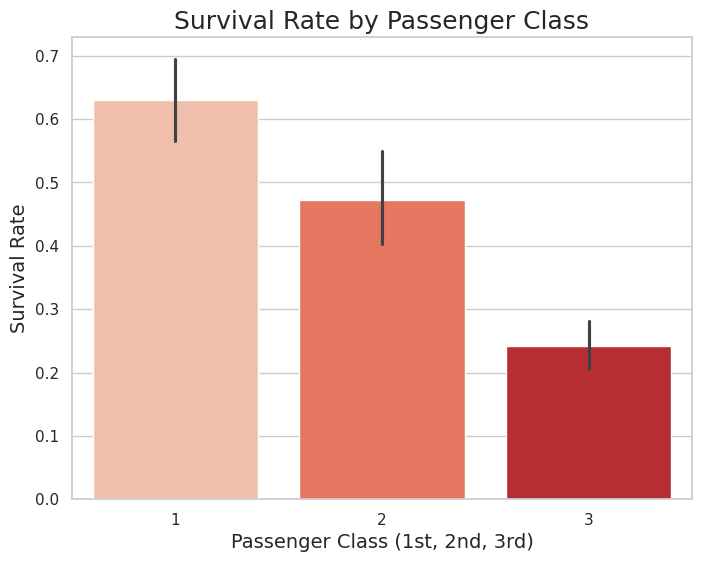

In [89]:
#Let us see the survival rates of passengers by class

sns.set(style="whitegrid")

palette = sns.color_palette("Reds",n_colors=3)

plt.figure(figsize=(8, 6))  # Set figure size
ax = sns.barplot(x=train_df['Pclass'], y=survived, hue=train_df['Pclass'], palette=palette, legend=False)
plt.title('Survival Rate by Passenger Class', fontsize=18)
plt.xlabel('Passenger Class (1st, 2nd, 3rd)', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()

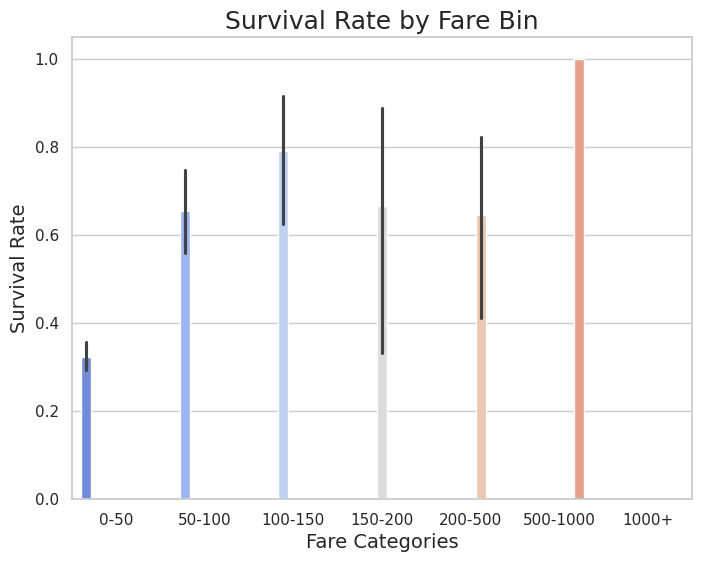

In [96]:
#Next lets see survival rate of passengers by Fare

fare_bins = [0, 50, 100, 150, 200, 500, 1000, float('inf')]
fare_labels = ['0-50', '50-100', '100-150', '150-200', '200-500', '500-1000','1000+']
train_df['Fare_Bin'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels)

sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", n_colors=len(train_df['Fare_Bin'].unique()))

plt.figure(figsize=(8, 6))  # Set figure size
ax = sns.barplot(x=train_df['Fare_Bin'], y=survived, hue=train_df['Fare_Bin'], palette=palette, legend=False)
plt.title('Survival Rate by Fare Bin', fontsize=18)
plt.xlabel('Fare Categories', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.show()


From the graphs above, we can conclude that being in a higher class and having a more expensive fare ticket definitely improves your chances of survival.